In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import glob


In [41]:
damage_train = glob.glob(r"C:\Users\USER\Desktop\ML\afinal\Capstone Project\Capstone Project\Hurricane Damage Classifiaction\test\damage/*.jpeg")

no_damage_train = glob.glob(r"C:\Users\USER\Desktop\ML\afinal\Capstone Project\Capstone Project\Hurricane Damage Classifiaction\test\no_damage/*.jpeg")
damage_test = glob.glob(r"C:\Users\USER\Desktop\ML\afinal\Capstone Project\Capstone Project\Hurricane Damage Classifiaction\validation_another\damage/*.jpeg")
no_damage_test = glob.glob(r"C:\Users\USER\Desktop\ML\afinal\Capstone Project\Capstone Project\Hurricane Damage Classifiaction\validation_another\no_damage/*.jpeg")

In [43]:
len(damage_train)

1000

In [45]:
len(no_damage_train)

1000

In [47]:
len(damage_test)

1000

In [49]:
len(no_damage_test)

1000

In [53]:
#test_data

image_test=[]
label_test=[]

for i in damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

for i in no_damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

In [55]:
#train_data

image_train =[]
label_train = []

for i in damage_train:
    img = plt.imread(i)
    image_train.append(img)
    label_train.append(1)

for i in no_damage_train:
    img = plt.imread(i)
    image_train.append(img)
    label_train.append(0)

In [57]:
#train_shuffle
image_train, label_train = shuffle(image_train, label_train, random_state = 100)

In [59]:
#test_shuffle
image_test, label_test = shuffle(image_test, label_test, random_state = 100)

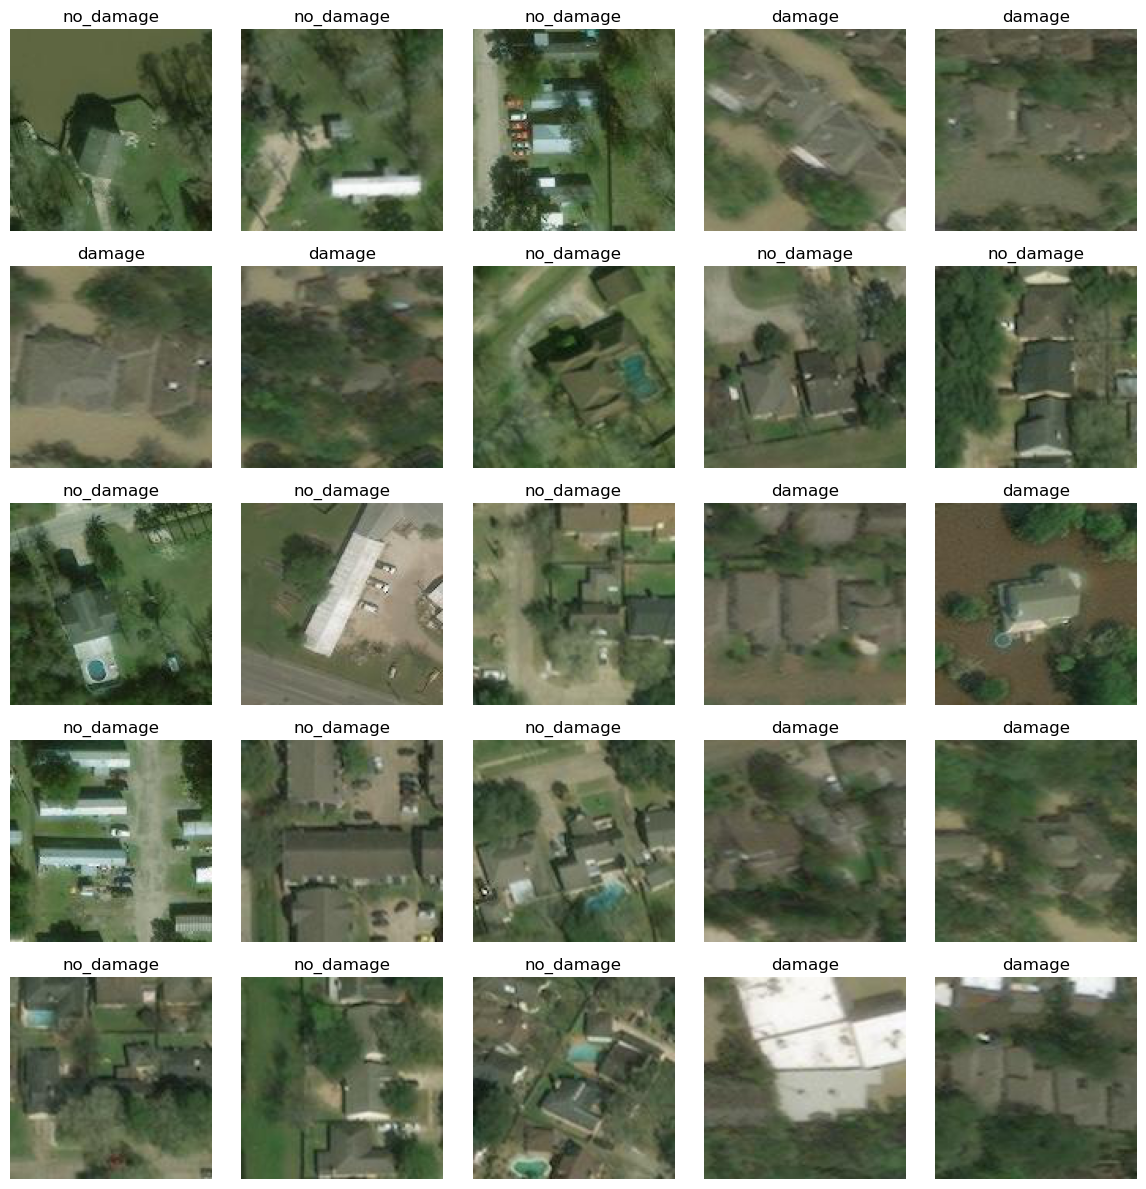

In [69]:
plt.figure(figsize = (12,12))

for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(image_train[i])
    if label_train[i]==1:
        plt.title('damage')
    else:
        plt.title('no_damage')
    plt.axis('off')
    plt.tight_layout()

In [71]:
#train_resize

x_train  = []

for i in image_train:
    x_train.append(resize(i,(64,64,3)))
x_train = np.array(x_train)

In [75]:
#test_resize

x_test = []

for i in image_test:
    x_test.append(resize(i,(64,64,3)))
x_test = np.array(x_test)

In [77]:
y_train = np.array(label_train)
y_test = np.array(label_test)

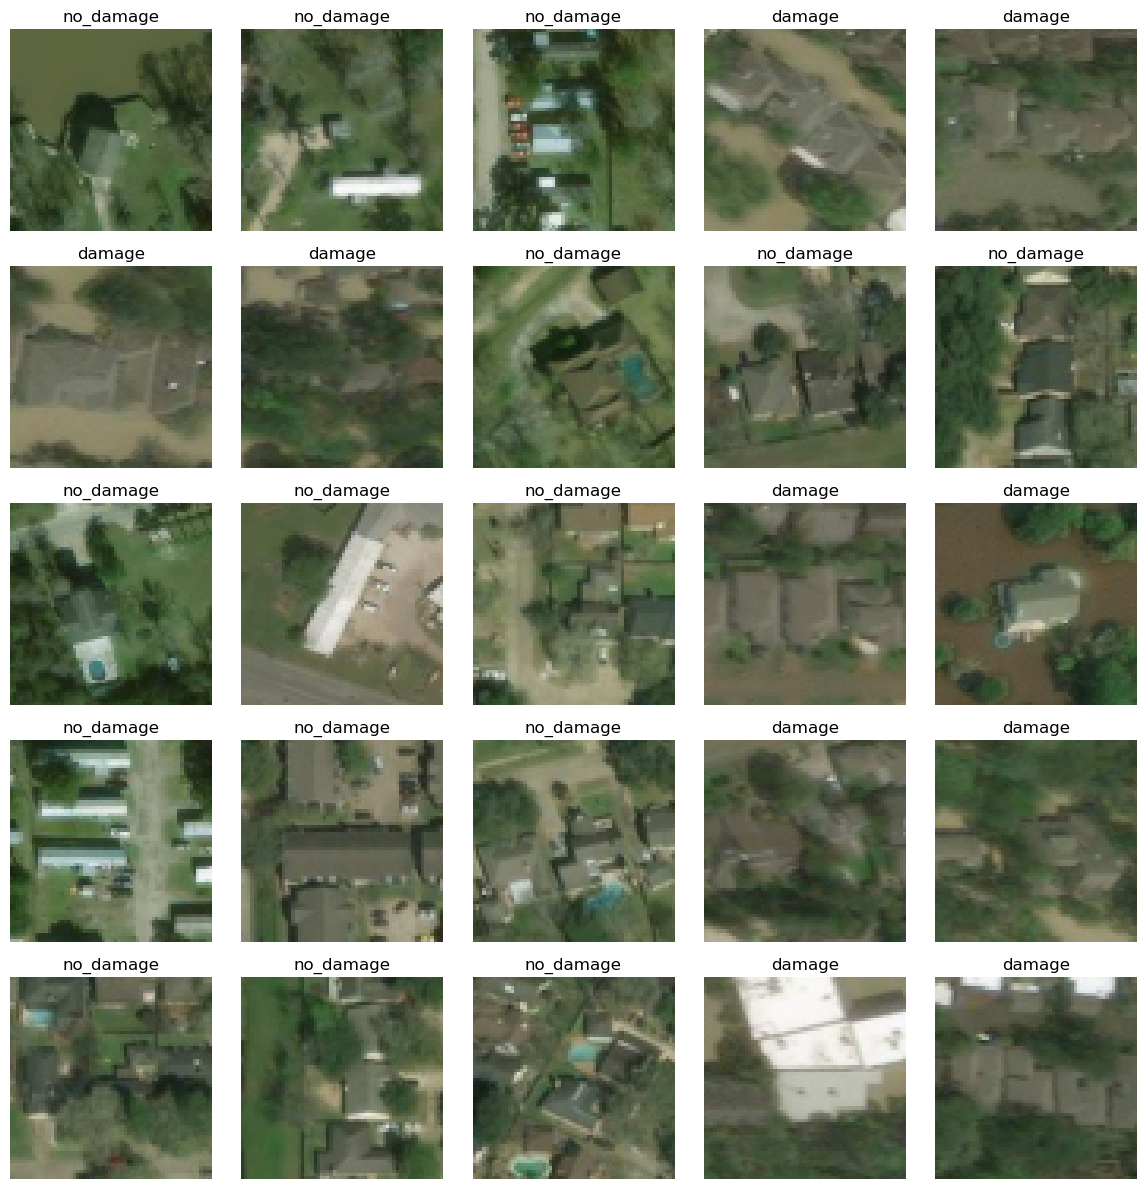

In [79]:
plt.figure(figsize = (12,12))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    if label_train[i]==1:
        plt.title('damage')
    else:
        plt.title('no_damage')
    plt.axis('off')
    plt.tight_layout()
    

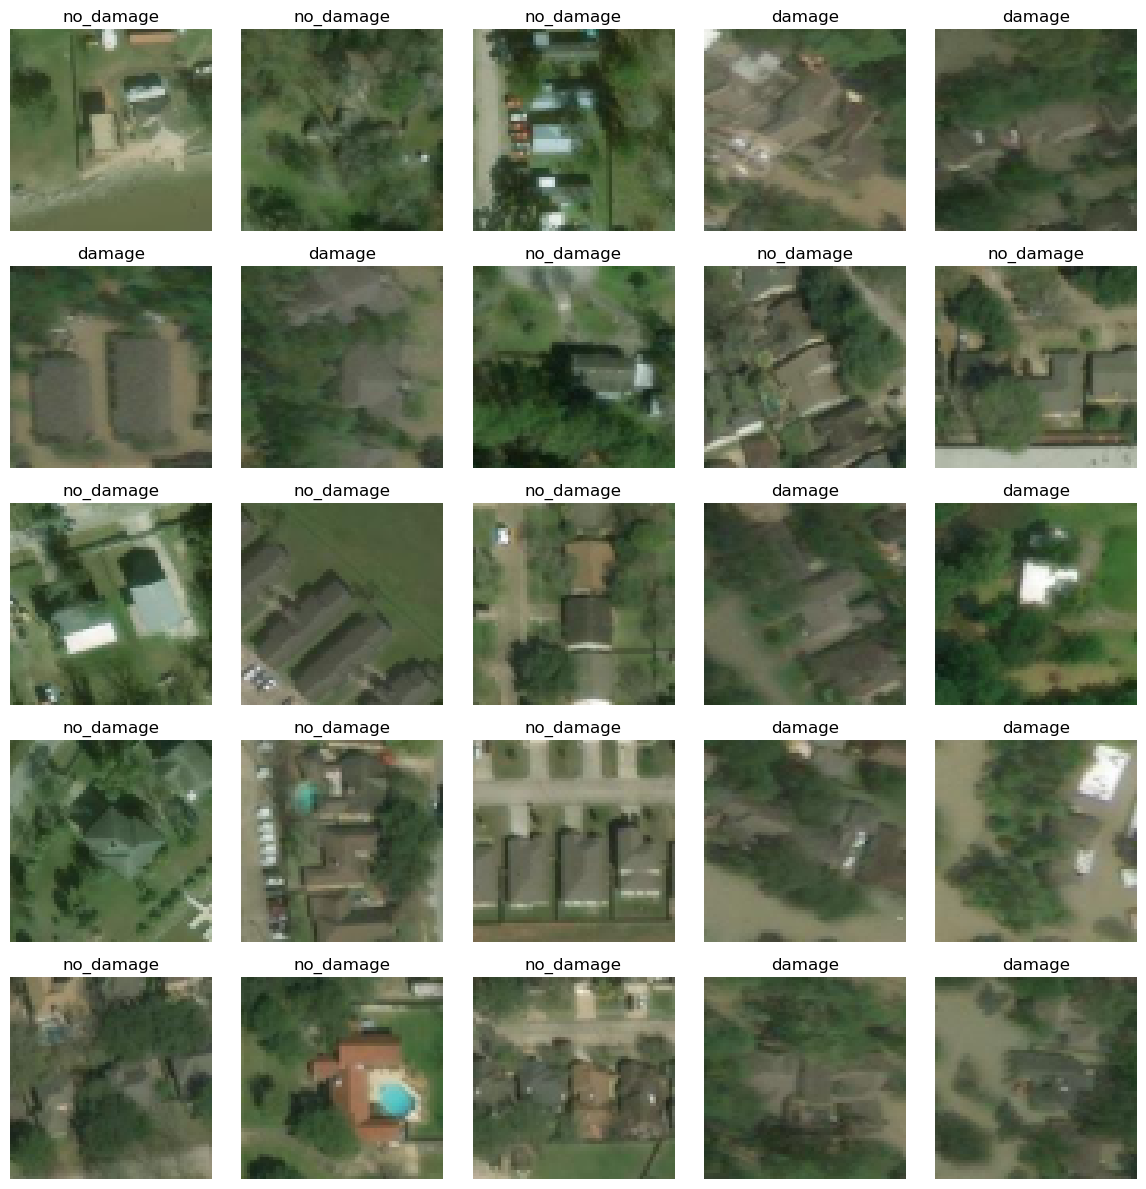

In [81]:
plt.figure(figsize = (12,12))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    if label_test[i]==1:
        plt.title('damage')
    else:
        plt.title('no_damage')
    plt.axis('off')
    plt.tight_layout()
    

In [83]:
x_train.shape


(2000, 64, 64, 3)

In [85]:
x_test.shape

(2000, 64, 64, 3)

In [87]:
y_train.shape

(2000,)

In [89]:
y_test.shape

(2000,)

In [93]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (64,64,3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [99]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.fit(x_train,y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.5324 - loss: 0.7238 - val_accuracy: 0.6900 - val_loss: 0.6148
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7793 - loss: 0.5344 - val_accuracy: 0.7800 - val_loss: 0.5485
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7914 - loss: 0.4758 - val_accuracy: 0.8050 - val_loss: 0.4905
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8230 - loss: 0.4193 - val_accuracy: 0.7950 - val_loss: 0.4484
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8196 - loss: 0.3958 - val_accuracy: 0.7700 - val_loss: 0.4520
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8624 - loss: 0.3507 - val_accuracy: 0.8250 - val_loss: 0.3996
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8738 - loss: 0.3183 - val_accuracy: 0.8250 - val_loss: 0.3888
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8624 - loss: 0.3103 - val_accuracy: 0.7950 - v

In [103]:
model.evaluate(x_train,y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9070 - loss: 0.2439


[0.2625367045402527, 0.8985000252723694]

In [213]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [217]:
y_pred.shape

(2000, 1)

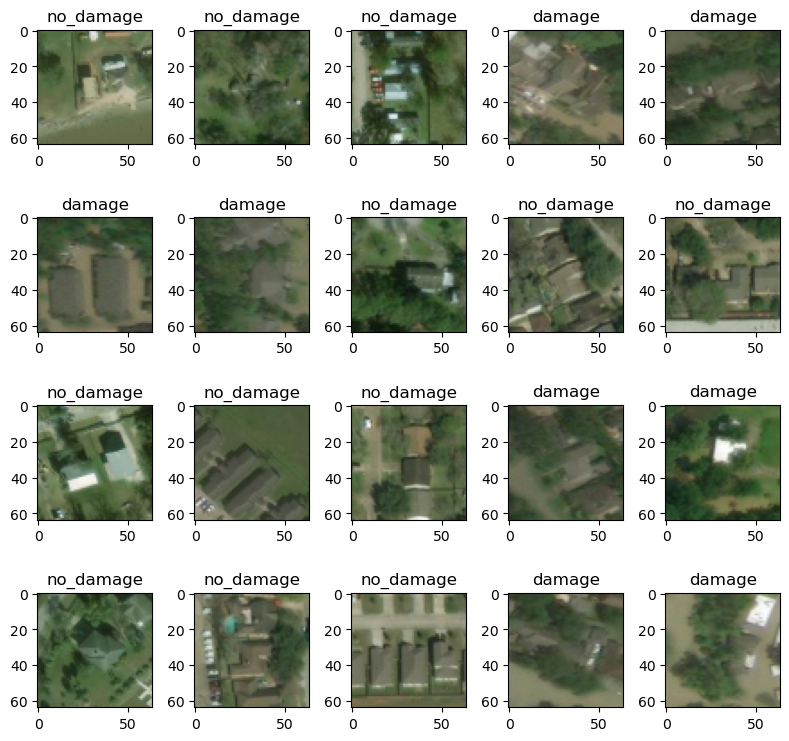

In [219]:
plt.figure(figsize = (8,8))
for i in range (20):
    plt.subplot(4,5, i+1)
    plt.imshow(x_test[i])
    plt.title(label_test[i])
    if label_test[i]==1:
        plt.title('damage')
    else:
        plt.title('no_damage')
    plt.tight_layout()
    

In [225]:
from sklearn.metrics import ConfusionMatrixDisplay

In [245]:
y_pred = np.array(y_pred).ravel() #Convert y_test to a NumPy array

In [247]:
y_pred = (y_pred >= 0.5).astype(int) #Convert probabilities to class labels using a threshold

In [249]:
y_test = np.array(y_test).ravel() #Convert y_test to a NumPy array

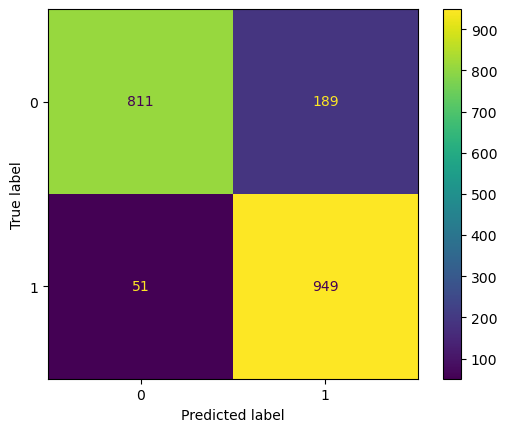

In [251]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [253]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [255]:
print('Classification Report:\n', classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      1000
           1       0.83      0.95      0.89      1000

    accuracy                           0.88      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.88      0.88      2000



In [257]:
print('Accuracy score:', accuracy_score(y_test,y_pred)*100)

Accuracy score: 88.0
